# Implementation of Piezoelectric Crystals on San Diego Roads
### Names and PIDs:
- Tejas Gopal: A12756764
- David Liau: A12867539
- Vivek Koppuru: A12282018
- Hunter Lai: A12800416
- Yahan Chen: A92156448

### Regarding Introduction, Background and Data Description:
#### All background information, introduction to our research question, data description, and further explanation of methods is also provided in the project proposal (ProjectProposal.ipynb).

## Part 0a: Introduction and Background

Alternative energy is one of the biggest areas where people are looking to improve in order to build a more sustainable world. While researching, we came across new technology that uses piezoelectric crystals in order to turn vibrations on the roads by cars into electricity, which lead us to think about its potential. 

### Background Information

Finding sources of alternative energy is incredibly important as fossil fuel supplies dwindle. Piezoelectric devices can be used for “harvesting the vibrational energy of roads and walkways due to traffic, can produce electrical energy that is predictable (based on traffic patterns), and locally storable” (Stanford). Our intention in using the datasets listed above is to locate the streets with the highest traffic volume, as this information can be used to help determine what areas of road are going to be the most valuable energy collecting locations.

To put this into context, as part of a pilot program approved by the California Energy Commission (CEC), several California highways will be covered in piezoelectric crystals that will turn vibrations into electricity. This technology can capture a portion of the energy resulting from the friction between the car and the road. The materials needed to cover a kilometer of a two-lane street will cost approximately 405,253 dollars, so we intend to find the areas which are most heavily traveled, and calculate the efficiency of implementing this onto that area (Stanford). The Stanford study also reveals that each car traveling on this 1-km strip will generate .19 MJ which will save 0.0064 cents, saving about one twentieth of the cost of gasoline on this strip (estimated 0.124 cents). The street used in this study was projected to generate a revenue of 33,565 dollars a year, meaning it would take 12 years to offset the original cost of implementation. In addition, other studies estimate that the energy generated from a 10 mile stretch of four-lane roadway can power the entire city of Burbank, which has a population numbering 105,000 people (ZME Science). A case study in Israel revealed that a one kilometer stretch of a single and four lane road integrated with piezoelectricity generated 200 KWh for the single lane and one MWh on four lanes (Charif & Kour). Using these pieces of information, we can calculate whether or not such a project would be profitable.

We are specifically using San Diego’s datasets because California is the car capital of the world; therefore, with this greater volume of cars, we are more likely to find areas where the energy generated by all the cars will offset the costs. Our hypothesis states our prediction that there are areas in San Diego where these piezoelectric energy generators would be efficient, largely due to the high traffic volume. Other factors which may affect piezoelectric road efficiency are vehicle speed and vehicle weight, which is something we will want to keep in mind as we are studying data from both surface streets and highways. Implementation also needs to be considered as past implementations of these crystals have laid out long stretches (> 1km) of the piezoelectric generators, which may be more difficult to implement on surface streets. In summary, two of the main pieces of information that we can use in our project are that 1 car traveling over a 1-km strip will generate the energy equivalent to 0.0064 cents and the cost of implementing this 1-km strip will be 405,253 dollars. Traffic data can then be used to estimate which areas will be most profitable, and just how profitable they will be.

References (include a link):
1) Garland, Rex. "Piezoelectric Roads in California." Piezoelectric Roads in California. N.p., 26 Apr. 2013. Web. 19 May 2017. 
Link: http://large.stanford.edu/courses/2012/ph240/garland1/
2) Kour, Ravjeet and Ahmad Charif. “Piezoelectric Roads: Energy Harvesting Method Using Piezoelectric Technology.” OMICS International. OMICS International, 04 June 2016. Web. 19 May 2017. 
Link: https://www.omicsonline.com/open-access/piezoelectric-roads-energy-harvesting-method-using-piezoelectrictechnology-ier-1000132.php?aid=73891
3) Puiu, Tibi. "California's Highways Will Generate Electricity from Cars Driving over Them." ZME Science. ZME Science, 15 Aug. 2016. Web. 19 May 2017. 
Link: http://www.zmescience.com/ecology/renewable-energy-ecology/california-highway-electricity/

### Research Question
What are the optimal locations in the city that will generate the most amount of energy to offset the costs of the technology and bring alternative energy to the city? Can we predict information about a road, such as potential amounts of energy, cost of implementation, number of lanes, length of street, and expected profit that can be generated given a particular street?


## Part 0b: Data Description

We collected information from the datasets below for our analysis:

### Dataset #1:
Dataset Name: “Traffic Volumes”, City of San Diego
- Link to the dataset: https://data.sandiego.gov/datasets/traffic-volumes/
- Number of Observations: 12910

Description: This data set presents all traffic volumes within the city of San Diego, in the form of Average Daily Traffic Counts. It covers all counts recorded for the last 12 years. The dataset includes large avenues, medium sized streets and boulevards, and local small streets. In particular, the dataset focuses on specific segments on roads, which will be integral for our intersection segment analysis (primary road, 1st cross street, 2nd cross street). 

### Dataset #2:
Dataset #2:     
- Dataset Name: “Average Daily Traffic”, City of San Diego
- Link to the dataset: http://www.sandag.org/resources/demographics_and_other_data/transportation/adtv/sandiego_adt.pdf
- Number of Observations: 2327

Description: Contains average traffic volumes in all four compass directions over a four year period (2009-2013). This gives us a nice overview of traffic volumes over the past 5 years, forming a more complete picture of traffic in San Diego. We will utilize this dataset as part of our cluster analysis.

In [1]:
# Imports !

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten

## Part 1: Data Cleaning / Pre-Processing

In this first part, we will load all the data from our .csv files into data frames. 
Then, we will perform data cleaning on these data frames, by erasing certain unneeded columns and dropping NaNs. Finally, we construct Python dictionaries, mapping locations or (segments and entire roads) to their associated traffic volumes for later use.

In [2]:
# Gather data into dataframes

traffic_main_df = pd.read_csv('traffic_counts_datasd.csv')
intersections_df = pd.read_csv('Intersections.csv')

In [3]:
# Perform data cleaning on the dataframes

# Remove directional columns from traffic_counts
traffic_main_df.drop('id', 1, inplace=True)
traffic_main_df.drop('northbound_count', 1, inplace=True)
traffic_main_df.drop('southbound_count', 1, inplace=True)
traffic_main_df.drop('all_count', 1, inplace=True)
traffic_main_df.drop('eastbound_count', 1, inplace=True)
traffic_main_df.drop('westbound_count', 1, inplace=True)
traffic_main_df.drop('file_no', 1, inplace=True)
traffic_main_df.drop('count_date', 1, inplace=True)

#Drop any rows with NaN values in traffic_main counts
traffic_main_df.dropna(inplace=True) 
traffic_main_df = traffic_main_df[traffic_main_df['total_count'] != 0]

# Printing out a sample (head) of the cleaned traffic_main dataframe (entire roads).
traffic_main_df.head()

,street_name,limits,total_count
0,01 AV,BEECH ST - CEDAR ST,23590
1,01 AV,ELM ST - FIR ST,3530
2,01 AV,ELM ST - FIR ST,4120
3,01 AV,ELM ST - FIR ST,3880
4,01 AV,GRAPE ST - HAWTHORN ST,7330


In [4]:
# Data cleaning on intersections data

intersections_df.drop('Document ID', 1, inplace=True)
intersections_df.drop('Remote ID', 1, inplace=True)
intersections_df.drop('Filename', 1, inplace=True)
intersections_df.drop('Received At', 1, inplace=True)
intersections_df.drop('Processed At', 1, inplace=True)

# Drop any rows with NaN values in traffic_main counts
intersections_df.dropna(inplace=True)

# Clean out new page headers (extracted from PDF)
intersections_df = intersections_df[intersections_df['1st Cross Street'] != '1st Cross Street']

# Clean the traffic count values (get rid of tail symbols e.g. 'N', 'S', etc.)
for index, row in intersections_df.iterrows():
    row['2009'] = row['2009'].split()[0]
    row['2010'] = row['2010'].split()[0]
    row['2011'] = row['2011'].split()[0]
    row['2012'] = row['2012'].split()[0]
    row['2013'] = row['2013'].split()[0]

# Taking the average traffic of all the years (2009 - 2013) and storing it in a column called "Average AADT"
intersections_df['Average AADT'] = 0
for i, row in intersections_df.iterrows():
    avg = int((int(row['2009']) + int(row['2010']) + int(row['2011']) 
                                                    + int(row['2012']) + int(row['2013']))) / 5
    intersections_df.set_value(i, 'Average AADT', avg) 

# Printing out a sample (head) of the cleaned intersections dataframe (intersections).
intersections_df.head()

,Primary Street,1st Cross Street,2nd Cross Street,2009,2010,2011,2012,2013,Average AADT
0,A ST,KETTNER BLVD,INDIA ST,5100,6100,6100,6100,6100,5900
1,A ST,INDIA ST,COLUMBIA ST,7900,6800,6800,6800,6800,7020
2,A ST,COLUMBIA ST,FRONT ST,8700,10100,10100,10100,8800,9560
3,A ST,FRONT ST,1ST AVE,12600,12000,9300,9300,11400,10920
4,A ST,1ST AVE,4TH AVE,11500,10800,10800,10800,10800,10940


In [5]:
# Create a dictionary of street-range locations to total_count
main_dict = dict()
main_counts = dict() # keeps track of # of keys found

for i, row in traffic_main_df.iterrows():
    keytp = (row['street_name'], row['limits'])
    # If key already exists in the dictionary, append to count and take sum of traffic values
    if keytp in main_dict:
        main_counts[keytp] = main_counts[keytp] + 1
        main_dict[keytp] = (main_dict[keytp] + row['total_count'])
    # Otherwise, initialize key to traffic value and count to 1
    else:
        main_counts[keytp] = 1
        main_dict[keytp] = row['total_count']

# Computing final average of all traffic values
for key in main_dict:
    main_dict[key] = main_dict[key] / main_counts[key]

total_traffic = dict()
for key in main_dict:
    street = str(key[0])
    if street in total_traffic.keys():
        total_traffic[street] = total_traffic[street] + main_dict[key]
    else:
        total_traffic[street] = main_dict[key]

total_traffic = {x:y for x,y in total_traffic.items() if y!=0}
        

In [6]:
# Creating dictionary for intersection pairs

inter_dict = dict()

for i, row in intersections_df.iterrows():
    key = (row['Primary Street'], row['1st Cross Street'], row['2nd Cross Street'])
    # Initialize key to intersection value 
    inter_dict[key] = row['Average AADT']

## Part 2: Data Visualization

We will now be visualizing the spread of data before analyzing it. This way, we can get a better understanding of the distribution of traffic volume in different settings (roads, intersections, or highways). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c008668>]], dtype=object)

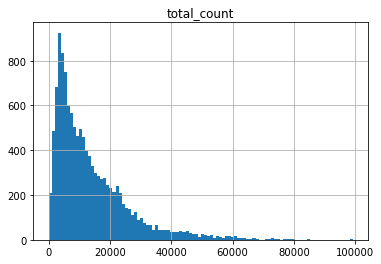

In [7]:
# Data Visualization
traffic_main_df.hist(column='total_count', bins=100)

The above plot shows the total count of all average daily traffic on individual roads. 
As you can see, there is a right skew because most streets have, on average, a smaller amount of traffic.
There are a few roads that do have a large amount of traffic, but the number of those roads are extremely small compared to small amounts of traffic.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112067fd0>]], dtype=object)

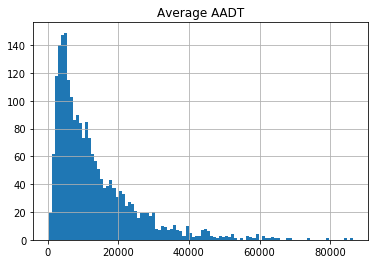

In [8]:
intersections_df.hist(column='Average AADT', bins=100)

Similarly, this plot shows the range of traffic for intersections. Again, the graph is shows a right skew because most intersections have a smaller amount of traffic, while very few intersections have a large amount of traffic.


## Part 3a: Data Analysis: K-Means Clustering

Our first step of analysis is to use K-Means. We aim to separate the data into five distinct groups, each with their own mean traffic volume. This way, we can categorize any road as part of a larger group (e.g. avenues, boulevards, and local roads).

In addition, we can now predict information about a given road based on the cluster it belongs to, such as length, number of lanes, energy generated, cost of implementation, and profit.

For the purposes of our research question, we will be focusing mainly on the amount of energy generated, the cost of implementing crystals on each road, and the total profit to be gained annually.


In [9]:
# K-means clustering to find groups of traffic volumes
# energy generated depends on (worst case, 20 mpg car generates 0.19 MJ by travelling 1 km strip)
# Make a new dataframe joining 

total_traffic
d1 = total_traffic.keys()
d1 = [i for i in range(len(d1))]
d2 = total_traffic.values()
d2 = [int(x) for x in d2]

d1w = whiten(d1)
d2w = whiten(d2)

In [10]:
# Putting data in a numpy array for k-means fit
data = np.vstack([d1w, d2w]).T

In [11]:
# Fitting the data
km = KMeans(n_clusters=5)
km.fit(data)

# Getting a dictionary of the results of each cluster
results = km.predict(data)

# Storing each datapoint in an individual cluster
l1 = list(total_traffic.keys())
clusters = {}
n = 0
for item in results:
    if item in clusters:
        clusters[item].append(l1[n])
    else:
        clusters[item] = [l1[n]]
    n+=1

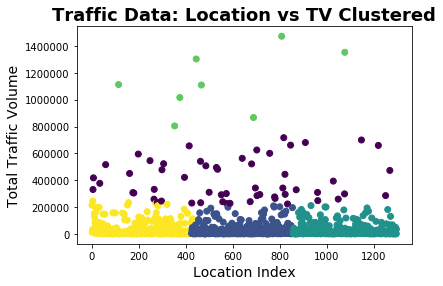

In [12]:
# Let's check out the clusters that KMeans found!!!!
plt.scatter(d1, d2, c=km.labels_);
plt.xlabel('Observation')
plt.ylabel('AADT')

# Add title, labels and legend
plt.title("Traffic Data: Location vs TV Clustered", fontsize=18, fontweight='bold')
plt.xlabel('Location Index', fontsize=14);
plt.ylabel('Total Traffic Volume', fontsize=14);

The above K-means visualization displays five clusters of traffic volumes ranging from large avenues to small, local streets. As you can see, the y-axis represents total traffic volumes on a given x-axis (which represents location index). 

Each cluster is color coded according to its proximity to a certain mean (k-mean), displaying the type of street it corresponds to. This way, we can map out the location space in terms of avenues, boulevards, local streets, etc. 

As you can see, the top cluster consists of locations with large traffic values, which we have verified (more or less using Google maps). This will help us categorize a street based on the cluster it belongs to, as well as retrieve important information regarding said street (including energy gained, money generated, number of lanes, and approximate length of street).

### Key: 
- Top cluster = Largest Avenues
- Middle Cluster = Medium-sized Roads (e.g. Boulevards, Smaller Aves)
- Bottom Clusters = Local Roads & Main Roads

In [13]:
# Construct average traffic volume segments for each of the 5 clusters
map_avgs = dict()
currSum = 0
currCount = 0

for item in clusters:
    
    # We reset current sum and current count for each new cluster
    currSum = 0
    currCount = 0
    for loc in clusters[item]:
        currSum = currSum + total_traffic[loc]
        currCount = currCount + 1
    
    # set dictionary value
    map_avgs[item] = currSum / currCount

In [14]:
# Determine the location closest to the average traffic volume within each cluster:
for item in clusters:
    minDiff = 10000000000000.0
    optLoc = "N/A"
    
    for loc in clusters[item]:
        if (np.fabs(total_traffic[loc] - map_avgs[item]) < minDiff):
            minDiff = np.fabs(total_traffic[loc] - map_avgs[item])
            optLoc = loc
    
    # Printing the result from each cluster 
    print(item) # Index of cluster
    print(optLoc) # Location closest to average
    print(total_traffic[optLoc]) # Traffic Volume at Location
    print(minDiff) # Difference between location's traffic volume and the average of the cluster

4
CATALINA  BL
29046.0
342.56601215
0
SUNSET CLIFFS BL
393416.06666666665
6652.41203692
3
BALBOA AV
1112507.3063492063
17146.6247024
1
HEALTH CENTER DR
26112.0
149.094065476
2
SN DIEGO AV
24250.0
71.2722890551


### * The above data is an example of the streets that are closest to the mean of each cluster. Because the sklearn clustering algorithm runs differently everytime, the above data will vary every time you reload the data into the dictionary. Our actual analysis uses the 5 streets that we most commonly observed in each cluster. *

In [15]:
# cost per lane per 1 mi * length in miles * number of lanes
def computeCost(miles, lanes):
    return 326095 * miles * lanes;

# amount of energy generated in mJ
def computeEnergy(traffic_volume):
    return 0.305776 * traffic_volume;

# energy in MJ per 20 mpg car over 1 mi * kwh in 1 MJ * cents per kwh in San Diego * number of cars
def computeEnergyInDollars(traffic_volume):
    return 0.305776 * 277.78 * .211 * traffic_volume;

# net gain/loss is (energy's worth in $ - cost of implementation)
def computeSavings(energy, cost):
    return energy - cost;

In [16]:
# Create a dictionary storing information about type of street, optimal location within that category of street, 
# number of lanes approximation, energy generated approximation, and cost approximation

clusters_results = dict()

# Determining energy (in mJ), cost of implementation, expected revenue, and the monetary value of energy for each cluster.

energy_scott = computeEnergy(total_traffic['SCOTT ST'])
energy_rev_scott = computeEnergyInDollars(total_traffic['SCOTT ST'])
cost_scott = computeCost(0.84,1)
savings_scott = computeSavings(energy_rev_scott, cost_scott)

energy_madison = computeEnergy(total_traffic['MADISON AV'])
energy_rev_madison = computeEnergyInDollars(total_traffic['MADISON AV'])
cost_madison = computeCost(1.55,2)
savings_madison = computeSavings(energy_rev_madison, cost_madison)

energy_antigua = computeEnergy(total_traffic['ANTIGUA BL'])
energy_rev_antigua = computeEnergyInDollars(total_traffic['ANTIGUA BL'])
cost_antigua = computeCost(2.04,5)
savings_antigua = computeSavings(energy_rev_antigua, cost_antigua)

energy_euclid = computeEnergy(total_traffic['EUCLID AV'])
energy_rev_euclid = computeEnergyInDollars(total_traffic['EUCLID AV'])
cost_euclid = computeCost(5.80,5)
savings_euclid = computeSavings(energy_rev_euclid, cost_euclid)

energy_balboa = computeEnergy(total_traffic['BALBOA AV'])
energy_rev_balboa = computeEnergyInDollars(total_traffic['BALBOA AV'])
cost_balboa = computeCost(5.92,9)
savings_balboa = computeSavings(energy_rev_balboa, cost_balboa)

clusters_results['Small:1'] = ("Energy Generated = " + str(energy_scott)+ " mJ", "Energy Revenue = $" + str(energy_rev_scott), "Cost = $" + str(cost_scott), "Savings = " + str(savings_scott), 
                               "Length = " + str(0.84), "Number of Lanes = " + str(1))
clusters_results['Small:2'] = ("Energy Generated = " + str(energy_madison)+ " mJ", "Energy Revenue = $" + str(energy_rev_madison), "Cost = $" + str(cost_madison), "Savings = " + str(savings_madison), 
                               "Length = " + str(1.55), "Number of Lanes = " + str(2))
clusters_results['Small:3'] = ("Energy Generated = " + str(energy_antigua)+ " mJ", "Energy Revenue = $" + str(energy_rev_antigua), "Cost = $" + str(cost_antigua), "Savings = " + str(savings_antigua), 
                               "Length = " + str(2.04), "Number of Lanes = " + str(5))
clusters_results['Medium'] = ("Energy Generated = " + str(energy_euclid)+ " mJ", "Energy Revenue = $" + str(energy_rev_euclid), "Cost = $" + str(cost_euclid), "Savings = " + str(savings_euclid), 
                              "Length = " + str(5.80), "Number of Lanes = " + str(5))
clusters_results['Large'] = ("Energy Generated = " + str(energy_balboa)+ " mJ", "Energy Revenue = $" + str(energy_rev_balboa), "Cost = $" + str(cost_balboa), "Savings = " + str(savings_balboa), 
                             "Length = " + str(5.92), "Number of Lanes = " + str(9))

# This is the dictionary of all results for each cluster. We will use this dictionary to make predictions about other roads
# depending on which cluster said road belongs to.
print(clusters_results)

{'Small:1': ('Energy Generated = 7668.89605511111 mJ', 'Energy Revenue = $449486.11464582925', 'Cost = $273919.8', 'Savings = 175566.31464582926', 'Length = 0.84', 'Number of Lanes = 1'), 'Small:2': ('Energy Generated = 8136.943980800001 mJ', 'Energy Revenue = $476919.14308617765', 'Cost = $1010894.5', 'Savings = -533975.3569138224', 'Length = 1.55', 'Number of Lanes = 2'), 'Small:3': ('Energy Generated = 8579.5700296 mJ', 'Energy Revenue = $502862.15515550267', 'Cost = $3326169.0', 'Savings = -2823306.8448444973', 'Length = 2.04', 'Number of Lanes = 5'), 'Medium': ('Energy Generated = 128864.87418866665 mJ', 'Energy Revenue = $7552973.88269897', 'Cost = $9456755.0', 'Savings = -1903781.11730103', 'Length = 5.8', 'Number of Lanes = 5'), 'Large': ('Energy Generated = 340178.0341062349 mJ', 'Energy Revenue = $19938372.060260314', 'Cost = $17374341.599999998', 'Savings = 2564030.4602603167', 'Length = 5.92', 'Number of Lanes = 9')}


In [17]:
# Define function: given any street, let's make predictions on energy, cost, profits, and more!

def getStreetInfo(street_name):
    print("Finding info for " + street_name + "...")
    for item in clusters:
        if street_name in clusters[item] and "SCOTT ST" in clusters[item]:
            print(clusters_results['Small:1'])
        elif street_name in clusters[item] and "MADISON AV" in clusters[item]:
            print(clusters_results["Small:2"])
        elif street_name in clusters[item] and "ANTIGUA BL" in clusters[item]:
            print(clusters_results["Small:3"])
        elif street_name in clusters[item] and "EUCLID AV" in clusters[item]:
            print(clusters_results["Medium"])
        elif street_name in clusters[item] and "BALBOA AV" in clusters[item]:
            print(clusters_results["Large"])
    print("\n")

# These are same roads that we all know and love :)
getStreetInfo("GENESEE AV")
getStreetInfo("CONVOY ST")

# This is a possible edge case in which a street does not exist. Notice that no data is printed.
getStreetInfo("HELLO ST")

Finding info for GENESEE AV...
('Energy Generated = 340178.0341062349 mJ', 'Energy Revenue = $19938372.060260314', 'Cost = $17374341.599999998', 'Savings = 2564030.4602603167', 'Length = 5.92', 'Number of Lanes = 9')


Finding info for CONVOY ST...
('Energy Generated = 8579.5700296 mJ', 'Energy Revenue = $502862.15515550267', 'Cost = $3326169.0', 'Savings = -2823306.8448444973', 'Length = 2.04', 'Number of Lanes = 5')


Finding info for HELLO ST...




## Part 3b: Data Analysis: Top 10 Intersection Segments!

In this section, we will take the top 10 streets (as in, the top 10 intersections with the most traffic volume), 
and determine the total cost to implement the piezoelectric crystals on the street, the amount of energy gained from this
implementation, and the total amount of profit yearly.

This is our approach to determining *OPTIMAL* locations to place the sensors.

In [18]:
# First, find the top 10 segments by traffic volume and store into a list.
top10 = sorted(inter_dict, key=inter_dict.get, reverse=True)[:10]

In [19]:
# Printing out the information of the top 10 results.
# The data is as follows: Primary Road, First Cross Street, Second Cross Street, Total Traffic Volume.
top10info = {}
for i in top10:
    top10info[i] = [i, inter_dict[i]]
    print(top10info[i])

[('FAIRMOUNT AVE', 'INTERSTATE 8', 'CAMINO DEL RIO SOUTH'), 86400]
[('NORTH HARBOR DR', 'WINSHIP LN', 'LAUREL ST'), 84400]
[('CORONADO BRIDGE/ROUTE', '75 INTERSTATE 5', 'CITY LIMITS'), 79100]
[('MIRA MESA BLVD', 'WESTVIEW PKWY', 'INTERSTATE 15'), 74200]
[('FAIRMOUNT AVE', 'CAMINO DEL RIO SOUTH', 'MONTEZUMA RD'), 68860]
[('WEST MISSION BAY DR', 'INGRAHAM ST', 'SEA WORLD DR'), 67620]
[('MIRA MESA BLVD', 'BLACK MOUNTAIN DR', 'WESTVIEW PKWY'), 65000]
[('PALM AVE/ROUTE 75', 'SATURN BLVD', 'INTERSTATE 5'), 64040]
[('MIRAMAR RD', 'CAMINO RUIZ', 'BLACK MOUNTAIN RD'), 63940]
[('MIRAMAR RD', 'NOBEL DR', 'EASTGATE MALL'), 63380]


In [20]:
# Manual entries of segment length in miles and average estimate of number of lanes in segment
# When doing calculations, could also normalize all of these with 1 mile and see how the costs and stuff look like with 
#   amount of cars and lanes

# Note: We used Google Maps visualization to approximate the length and number of lanes of each location.
# Then, we append the number of lanes and length of road to each entry of the list.


top10info[('FAIRMOUNT AVE', 'INTERSTATE 8', 'CAMINO DEL RIO SOUTH')].append(0.3)
top10info[('FAIRMOUNT AVE', 'INTERSTATE 8', 'CAMINO DEL RIO SOUTH')].append(6)

top10info[('NORTH HARBOR DR', 'WINSHIP LN', 'LAUREL ST')].append(0.7)
top10info[('NORTH HARBOR DR', 'WINSHIP LN', 'LAUREL ST')].append(7)

top10info[('CORONADO BRIDGE/ROUTE', '75 INTERSTATE 5', 'CITY LIMITS')].append(2.1)
top10info[('CORONADO BRIDGE/ROUTE', '75 INTERSTATE 5', 'CITY LIMITS')].append(5)

top10info[('MIRA MESA BLVD', 'WESTVIEW PKWY', 'INTERSTATE 15')].append(0.2)
top10info[('MIRA MESA BLVD', 'WESTVIEW PKWY', 'INTERSTATE 15')].append(9)

top10info[('FAIRMOUNT AVE', 'CAMINO DEL RIO SOUTH', 'MONTEZUMA RD')].append(0.3)
top10info[('FAIRMOUNT AVE', 'CAMINO DEL RIO SOUTH', 'MONTEZUMA RD')].append(6)

top10info[('WEST MISSION BAY DR', 'INGRAHAM ST', 'SEA WORLD DR')].append(0.3)
top10info[('WEST MISSION BAY DR', 'INGRAHAM ST', 'SEA WORLD DR')].append(6)

top10info[('MIRA MESA BLVD', 'BLACK MOUNTAIN DR', 'WESTVIEW PKWY')].append(0.3)
top10info[('MIRA MESA BLVD', 'BLACK MOUNTAIN DR', 'WESTVIEW PKWY')].append(7)

top10info[('PALM AVE/ROUTE 75', 'SATURN BLVD', 'INTERSTATE 5')].append(0.3)
top10info[('PALM AVE/ROUTE 75', 'SATURN BLVD', 'INTERSTATE 5')].append(6)

top10info[('MIRAMAR RD', 'CAMINO RUIZ', 'BLACK MOUNTAIN RD')].append(0.8)
top10info[('MIRAMAR RD', 'CAMINO RUIZ', 'BLACK MOUNTAIN RD')].append(6)

top10info[('MIRAMAR RD', 'NOBEL DR', 'EASTGATE MALL')].append(0.3)
top10info[('MIRAMAR RD', 'NOBEL DR', 'EASTGATE MALL')].append(7)

print(top10info)

{('FAIRMOUNT AVE', 'INTERSTATE 8', 'CAMINO DEL RIO SOUTH'): [('FAIRMOUNT AVE', 'INTERSTATE 8', 'CAMINO DEL RIO SOUTH'), 86400, 0.3, 6], ('NORTH HARBOR DR', 'WINSHIP LN', 'LAUREL ST'): [('NORTH HARBOR DR', 'WINSHIP LN', 'LAUREL ST'), 84400, 0.7, 7], ('CORONADO BRIDGE/ROUTE', '75 INTERSTATE 5', 'CITY LIMITS'): [('CORONADO BRIDGE/ROUTE', '75 INTERSTATE 5', 'CITY LIMITS'), 79100, 2.1, 5], ('MIRA MESA BLVD', 'WESTVIEW PKWY', 'INTERSTATE 15'): [('MIRA MESA BLVD', 'WESTVIEW PKWY', 'INTERSTATE 15'), 74200, 0.2, 9], ('FAIRMOUNT AVE', 'CAMINO DEL RIO SOUTH', 'MONTEZUMA RD'): [('FAIRMOUNT AVE', 'CAMINO DEL RIO SOUTH', 'MONTEZUMA RD'), 68860, 0.3, 6], ('WEST MISSION BAY DR', 'INGRAHAM ST', 'SEA WORLD DR'): [('WEST MISSION BAY DR', 'INGRAHAM ST', 'SEA WORLD DR'), 67620, 0.3, 6], ('MIRA MESA BLVD', 'BLACK MOUNTAIN DR', 'WESTVIEW PKWY'): [('MIRA MESA BLVD', 'BLACK MOUNTAIN DR', 'WESTVIEW PKWY'), 65000, 0.3, 7], ('PALM AVE/ROUTE 75', 'SATURN BLVD', 'INTERSTATE 5'): [('PALM AVE/ROUTE 75', 'SATURN BLVD'

In [21]:
# Determining the top 10 cost for each entry in the list. We get the equation from our reference papers (see proposal).
top10cost = {}
for i in top10info:
    # cost per lane per 1 mi * length in miles * number of lanes
    top10cost[i] = 326095 * top10info[i][2] * top10info[i][3]
    print(top10cost[i])

586971.0
1597865.5
3423997.5
586971.0
586971.0
586971.0
684799.5
586971.0
1565256.0
684799.5


In [22]:
# Determining the top 10 monetary value of energy for each entry in the list.
# We get the equation from our reference papers (see proposal).
top10energy = {}
for i in top10info:
    # energy in MJ per 20 mpg car over 1 mi * kwh in 1 MJ * cents per kwh in San Diego * number of cars
    top10energy[i] = 0.305776 * 277.78 * .211 * top10info[i][1]
    print(top10energy[i])

1548462.0515973119
1512618.0226251518
1417631.345848928
1329813.474867136
1234109.9175114688
1211886.6195487294
1164930.9415952
1147725.8076885631
1145933.6062399552
1135897.2781277504


In [23]:
# Determining the top 10 savings for each entry in the list. We get the equation from our reference papers (see proposal).
top10savings = {}
for i in top10info:
    # cost of energy generated - cost of constructing
    top10savings[i] = top10energy[i] - top10cost[i]
    print(top10savings[i])

961491.0515973119
-85247.47737484821
-2006366.154151072
742842.474867136
647138.9175114688
624915.6195487294
480131.4415952
560754.8076885631
-419322.3937600448
451097.7781277504


In [24]:
# Constructing a list of results with every field for each entry.
top10results = []
for i in range(0, 10):
    top10results.append([top10[i], top10cost[top10[i]], top10energy[top10[i]], top10savings[top10[i]]])

In [25]:
# Displaying segment, cost of building, energy generated cost, savings for each of the top 10 locations.
for i in top10results:
    print(i)

[('FAIRMOUNT AVE', 'INTERSTATE 8', 'CAMINO DEL RIO SOUTH'), 586971.0, 1548462.0515973119, 961491.0515973119]
[('NORTH HARBOR DR', 'WINSHIP LN', 'LAUREL ST'), 1597865.5, 1512618.0226251518, -85247.47737484821]
[('CORONADO BRIDGE/ROUTE', '75 INTERSTATE 5', 'CITY LIMITS'), 3423997.5, 1417631.345848928, -2006366.154151072]
[('MIRA MESA BLVD', 'WESTVIEW PKWY', 'INTERSTATE 15'), 586971.0, 1329813.474867136, 742842.474867136]
[('FAIRMOUNT AVE', 'CAMINO DEL RIO SOUTH', 'MONTEZUMA RD'), 586971.0, 1234109.9175114688, 647138.9175114688]
[('WEST MISSION BAY DR', 'INGRAHAM ST', 'SEA WORLD DR'), 586971.0, 1211886.6195487294, 624915.6195487294]
[('MIRA MESA BLVD', 'BLACK MOUNTAIN DR', 'WESTVIEW PKWY'), 684799.5, 1164930.9415952, 480131.4415952]
[('PALM AVE/ROUTE 75', 'SATURN BLVD', 'INTERSTATE 5'), 586971.0, 1147725.8076885631, 560754.8076885631]
[('MIRAMAR RD', 'CAMINO RUIZ', 'BLACK MOUNTAIN RD'), 1565256.0, 1145933.6062399552, -419322.3937600448]
[('MIRAMAR RD', 'NOBEL DR', 'EASTGATE MALL'), 684799

## Part 3c: Data Analysis: Profit Models

Finally, we attempt to predict the expected profit gained by placing a piezoelectric crystal on a particular street using our
cluster-analysis dictionary. Then, we plot a linear model that displays the total amount of profit gained over the following
years.

Keep in mind that this is an approximation that does not account for other factors, such as wear and tear, cost of infrastructure, economic resources, and delay during construction. Refer to further pitfalls in the proposal.

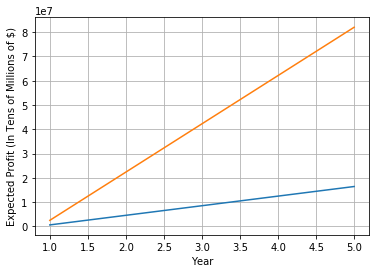

In [26]:
# profit models for any street, avenue, blvd, etc, NOT accounting for infrastructure costs, economic resources, and
# wear and tear.

def computeProfit(street_name):
    for item in clusters:
        if street_name in clusters[item] and "SCOTT ST" in clusters[item]:
            createModel(total_traffic[street_name], 0.84, 1)
        elif street_name in clusters[item] and "MADISON AV" in clusters[item]:
            createModel(total_traffic[street_name], 1.55, 2)
        elif street_name in clusters[item] and "ANTIGUA BL" in clusters[item]:
            createModel(total_traffic[street_name], 2.04, 5)
        elif street_name in clusters[item] and "EUCLID AV" in clusters[item]:
            createModel(total_traffic[street_name], 5.80, 5)
        elif street_name in clusters[item] and "BALBOA AV" in clusters[item]:
            createModel(total_traffic[street_name], 5.92, 9)
            
def createModel(total_traffic, miles, lanes):
    year = []
    profit = []
    for i in range(1, 6):
        year.append(i)
        profit.append(computeEnergyInDollars(total_traffic) * i - computeCost(miles, lanes))
        
    plt.plot(year, profit)
    plt.grid(True)
    plt.xlabel("Year")
    plt.ylabel("Expected Profit (In Tens of Millions of $)")

# Printing sample data. Convoy street has a lower slope, while Genesee clearly generates much more profit over time.
computeProfit("CONVOY ST")
computeProfit("GENESEE AV")

## Part 4: Conclusions/Discussion

Now we directly address our hypothesis. Recall that our hypothesis was the following statement:
    "We believe the optimal locations to place the piezoelectric crystals will be in areas of high traffic volume, specifically in dense intersections as opposed to entire lengths of roads. We believe we can predict information about a specific road by comparing its characteristics (length, number of lanes, traffic volume) to the optimal locations we find."

For convenience's sake, we will be splitting our answers into two parts, matching the two parts of the hypothesis.

##### Part 1: Optimal Locations to Place Crystals
From our analysis on each data set, we find that even though some areas may have high traffic volume, they may not be the most optimal locations to place the piezoelectric crystals. Several of these reasons may stem from the following: the number of lanes that the area has, or the length of the road. An example of this is in the Coronado Bridge: while its annual traffic volume is larger than most, it will ultimately cost the city of San Diego more than $2 million dollars in a single year because of its short length. This result will change over time, because there are fixed costs (i.e. implementation) in the first year.

However, from our cluster analysis, areas belonging to the top cluster (i.e. with the most amount of traffic) generated the most amount of profit. An example of this is Genesse Avenue, which could make a potential profit over over $80 million over 5 years (of course, not including the costs mentioned prviously).

Possible errors in our first answer may stem from potential pitfalls in our methods. For example, we only considered individual segments of roads in our cost implementation, instead of the entire length of the road (which we used for our cluster analysis). In addition, our energy equation was linear, excluding many of the potential factors that may affect our overall cost-benefit output.

##### Part 2: Making Predictions 
We believe that our clustering analysis developed a pretty accurate model for predicting a road's characteristics given the placement of piezoelectric crystals on that road. We were able to clearly identify specific types of roads by clustering based on traffic volume, and found that most roads within each cluster had very similar statistics. To verify this, we used Google Maps and searched up a few street images, confirming the number of lanes, or length of the street. 

Similar to part 1, we found that implementing the crystals on large avenues compared to boulevards and smaller avenues produced a higher net profit. In addition, we identified a few smaller streets that had the potential to have a very high return on investment.

Possible errors in this analysis were as follows: allowing only five clusters in our data set prevented a more specific analysis of the given data. In addition, we realized that it may be a stretch to predict the length of the road specifically using Google Maps.

#### Thank you for considering our project, and we hope this analysis may serve to benefit the city of San Diego!!

#### Regards, 
#### David Liau, Tejas Gopal, Hunter Lai, Ya-han Chen, and Vivek Koppuru